# Sprint
## アンサンブル学習
スクラッチでアンサンブル学習の各種手法を実装していきます。


3種類のアンサンブル学習をスクラッチ実装していきます。そして、それぞれの効果を小さめのデータセットで確認します。


- ブレンディング
- バギング
- スタッキング

## 小さなデータセットの用意
以前も利用した回帰のデータセットを用意します。


[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。


train.csvを学習用（train）8割、検証用（val）2割に分割してください。

# 【問題1】
## ブレンディングのスクラッチ実装
**ブレンディング**をスクラッチ実装し、単一モデルより精度があがる例を**最低3つ**示してください。精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。
## ブレンディングとは
ブレンディングとは、N個の多様なモデルを独立して学習させ、推定結果を重み付けした上で足し合わせる方法です。最も単純には平均をとります。多様なモデルとは、以下のような条件を変化させることで作り出すものです。


- 手法（例：線形回帰、SVM、決定木、ニューラルネットワークなど）
- ハイパーパラメータ（例：SVMのカーネルの種類、重みの初期値など）
- 入力データの前処理の仕方（例：標準化、対数変換、PCAなど）

重要なのはそれぞれのモデルが大きく異なることです。


回帰問題でのブレンディングは非常に単純であるため、scikit-learnには用意されていません。


**《補足》**


分類問題の場合は、多数決を行います。回帰問題に比べると複雑なため、scikit-learnにはVotingClassifierが用意されています。


[sklearn.ensemble.VotingClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
display(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
# 数値列を利用
data_num = data.select_dtypes(include='number')
print(data_num.isnull().sum()[data_num.isnull().sum() > 0].sort_values(ascending=False))
data_num.info()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-nu

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_num.iloc[:, 1:-1].fillna(method = 'bfill').fillna(method = 'ffill').values
y = data_num['SalePrice'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)

In [4]:
print(y_train)
print(y_train_log)

[107500 160000 145000 ... 112000 234000 221000]
[11.58524613 11.98292909 11.88448902 ... 11.62625415 12.36307639
 12.30591798]


### ブレンディング検証: 1. 線形回帰\*w1 + SVM\*w2 + 決定木\*w3

In [5]:
# 単一モデル検証: 線形回帰
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train_std, y_train_log)
y_pred_log = lr.predict(X_valid_std)
mse_lr = mean_squared_error(y_valid_log, y_pred_log)
print(f'MSE(Linear Regression): {mse_lr}')

MSE(Linear Regression): 0.03629917716266756


In [6]:
# 単一モデル検証: SVM
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_std, y_train_log)
y_pred_log = svr.predict(X_valid_std)
mse_svr = mean_squared_error(y_valid_log, y_pred_log)
print(f'MSE(SVR): {mse_svr}')

MSE(SVR): 0.026533348225285452


In [7]:
# 単一モデル検証: 決定木
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train_std, y_train_log)
y_pred_log = dtree.predict(X_valid_std)
mse_dtree = mean_squared_error(y_valid_log, y_pred_log)
print(f'MSE(Decision Tree): {mse_dtree}')

MSE(Decision Tree): 0.042657620106250134


In [8]:
# 単一検証で利用した学習済みモデルを流用
w = np.array([3, 9, 1])
y_pred_brend_1 = np.concatenate((dtree.predict(X_valid_std).reshape(-1, 1)*w[0],
                                svr.predict(X_valid_std).reshape(-1, 1)*w[1],
                                dtree.predict(X_valid_std).reshape(-1, 1)*w[2]), axis=1)
y_pred_brend_1 = np.sum(y_pred_brend_1, axis=1) / np.sum(w)
print(f'MSE(Brending 1): {mean_squared_error(y_valid_log, y_pred_brend_1)}')

MSE(Brending 1): 0.022547954473376906


In [9]:
print(y_valid[:10])
print(np.exp(y_pred_brend_1[:10]))

[200624 133000 110000 192000  88000  85000 282922 141000 745000 148800]
[176794.92042778 159780.28053214 102400.89735024 199958.72669228
  94641.46174158 108429.71747968 261658.33326506 138887.29601766
 268664.47202356 160985.1520686 ]


単一検証の精度に対応した重みをかけ加重平均をとった。

結果、単一検証に比べてより良い結果を得ることができた。

### ブレンディング検証: 2. SVM kernel = {'linear', 'poly', 'rbf', 'sigmoid'} 
SVMの4種類のカーネルを用いて検証を行う

In [10]:
# 単一モデル検証: kernel='linear'
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_std, y_train_log)
y_pred_log = svr_linear.predict(X_valid_std)
print(f'MSE(kernel=\'linear\'): {mean_squared_error(y_valid_log, y_pred_log)}')

MSE(kernel='linear'): 0.04247592793306076


In [11]:
# 単一モデル検証: kernel='poly'(degree=2)
svr_poly = SVR(kernel='poly', degree=2)
svr_poly.fit(X_train_std, y_train_log)
y_pred_log = svr_poly.predict(X_valid_std)
print(f'MSE(kernel=\'poly\'): {mean_squared_error(y_valid_log, y_pred_log)}')

MSE(kernel='poly'): 0.40154505662867035


In [12]:
# 単一モデル検証: kernel='rbf'
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_std, y_train_log)
y_pred_log = svr_rbf.predict(X_valid_std)
print(f'MSE(kernel=\'rbf\'): {mean_squared_error(y_valid_log, y_pred_log)}')

MSE(kernel='rbf'): 0.026533348225285452


In [13]:
# 単一モデル検証: kernel='sigmoid'
svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train_std, y_train_log)
y_pred_log = svr_sigmoid.predict(X_valid_std)
print(f'MSE(kernel=\'sigmoid\'): {mean_squared_error(y_valid_log, y_pred_log)}')

MSE(kernel='sigmoid'): 41.921988032560485


In [14]:
# ブレンディング検証: kernel = {'linear', 'poly', 'rbf', 'sigmoid'} 
w = np.array([300, 50, 200, 1])
y_pred_brend_2 = np.concatenate((
    svr_linear.predict(X_valid_std).reshape(-1, 1)*w[0],
    svr_poly.predict(X_valid_std).reshape(-1, 1)*w[1],
    svr_rbf.predict(X_valid_std).reshape(-1, 1)*w[2],
    svr_sigmoid.predict(X_valid_std).reshape(-1, 1)*w[3]
), axis=1)
y_pred_brend_2 = np.sum(y_pred_brend_2, axis=1) / np.sum(w)
print(np.exp(y_pred_brend_2[:10]))
print(y_valid[:10])
print(f'MSE(Brending 2): {mean_squared_error(y_valid_log, y_pred_brend_2)}')

[195775.49693948 157723.79204684 105388.96407001 205678.27338049
 106498.9527799   99565.64060729 252488.45076081 134722.55248176
 273550.61333086 149334.55582   ]
[200624 133000 110000 192000  88000  85000 282922 141000 745000 148800]
MSE(Brending 2): 0.01901037826894898


In [15]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_valid_log, y_pred_brend_2))}')

RMSE: 0.1378781283197193


通じて4種のカーネルの予測結果で加重平均をとったところ、かなり精度を上げることができた。

sigmoidカーネルを使った予測結果は他のカーネルを使用したモデルに比べあまり精度が良くなかったが、少量の重みをつけることで考慮しない場合と比べて精度を上げることができた。

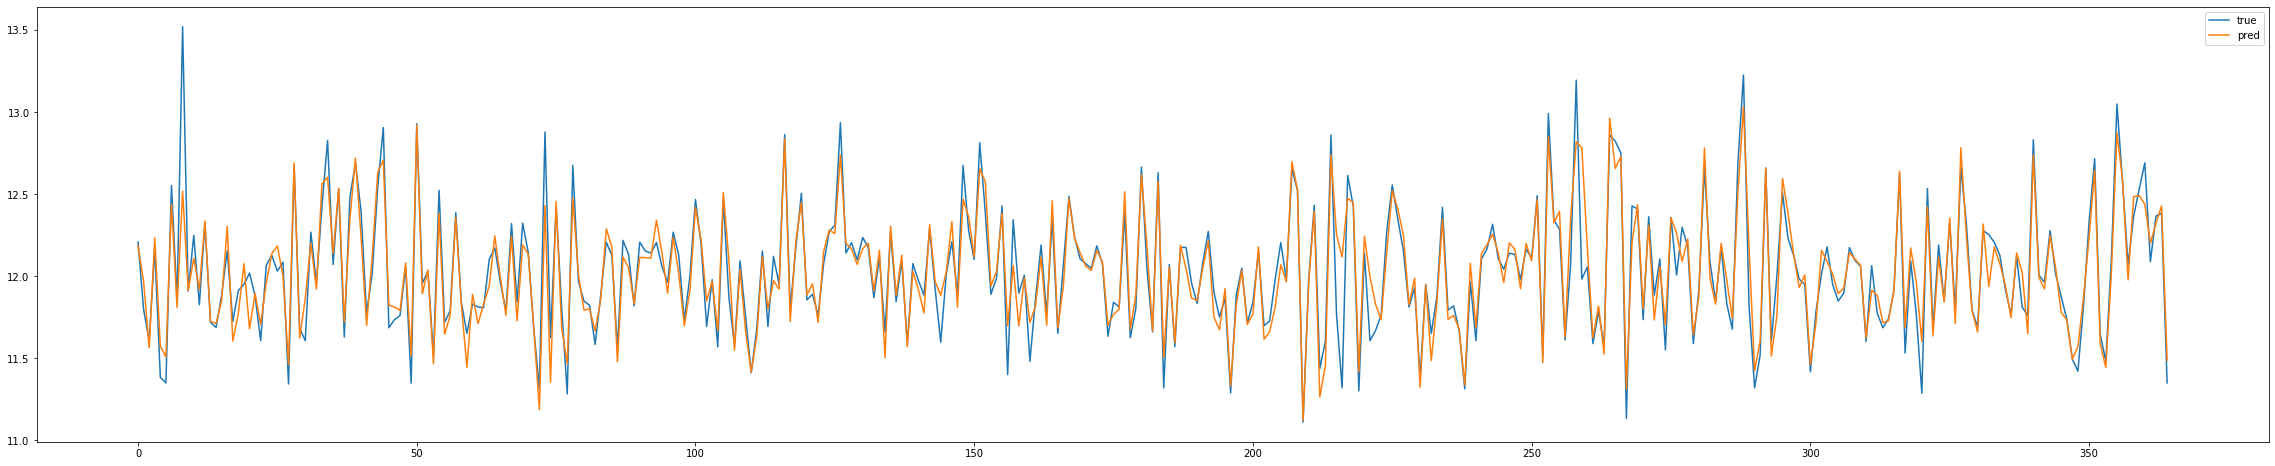

valid mean: 12.029447478464704
valid variance: 0.14871969602948648
pred mean: 12.026019078839644
pred variance: 0.12636425630007667


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(40, 8))
plt.plot(range(y_valid_log.shape[0]), y_valid_log, label='true')
plt.plot(range(y_pred_brend_2.shape[0]), y_pred_brend_2, label='pred')
plt.legend()
plt.show()
print(f'valid mean: {np.mean(y_valid_log)}')
print(f'valid variance: {np.var(y_valid_log)}')
print(f'pred mean: {np.mean(y_pred_brend_2)}')
print(f'pred variance: {np.var(y_pred_brend_2)}')

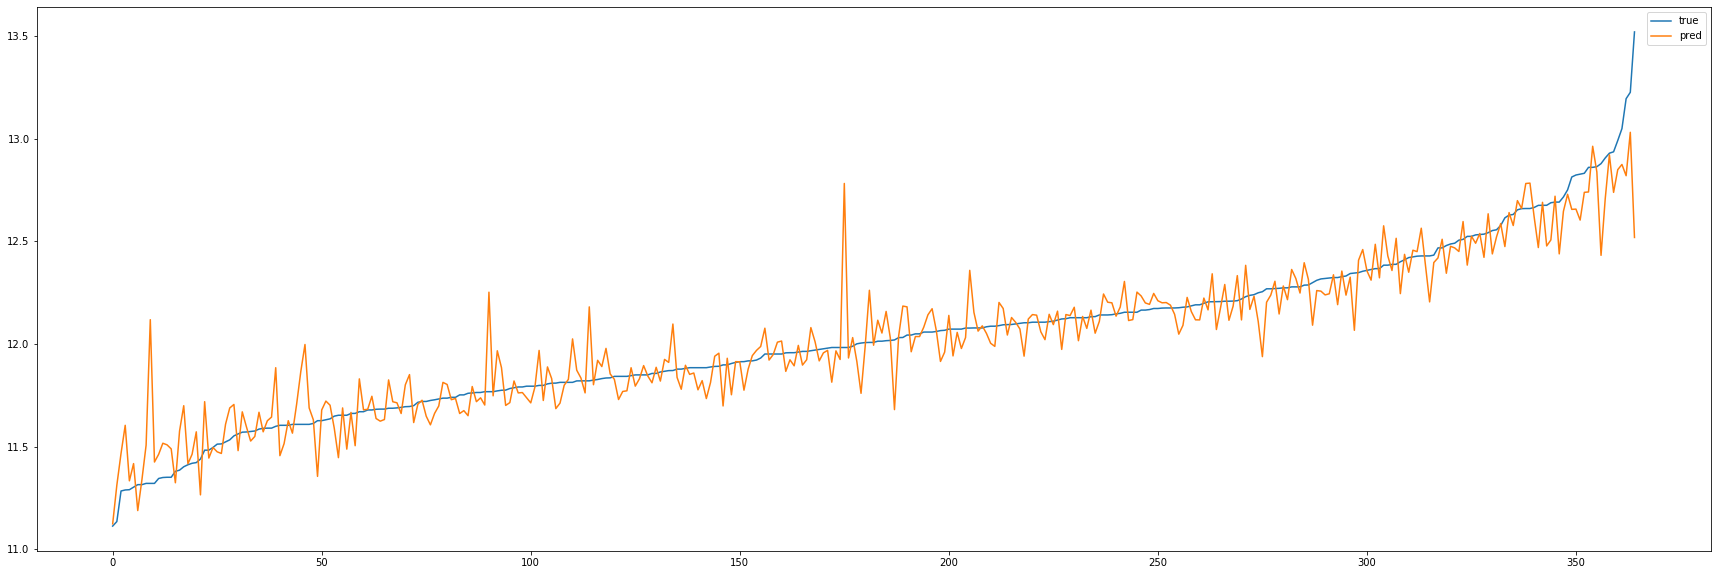

In [17]:
a = np.concatenate((y_valid_log.reshape(-1, 1), y_pred_brend_2.reshape(-1, 1)), axis=1)
b = a.tolist()
c = sorted(b, key=lambda x: x[0])
d = np.array(c)
%matplotlib inline
fig = plt.figure(figsize=(30, 10))
plt.plot(range(d[:, 0].shape[0]), d[:, 0], label='true')
plt.plot(range(d[:, 1].shape[0]), d[:, 1], label='pred')
plt.legend()
plt.show()

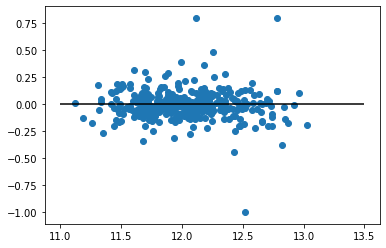

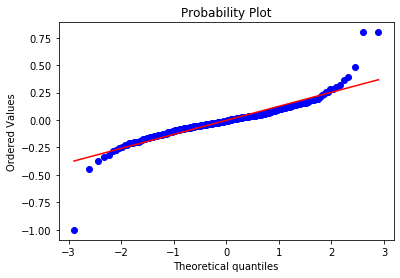

In [18]:
# 残差プロットをしてみる
%matplotlib inline
plt.scatter(y_pred_brend_2, y_pred_brend_2-y_valid_log)
plt.hlines(y=0, xmin=11, xmax=13.5)
plt.show()
# Quantile plot
import scipy.stats as stats
stats.probplot(y_pred_brend_2-y_valid_log, dist="norm", plot=plt)
plt.show()

予測結果をプロットした図を見ると、傾向としてはうまく予測できているが実際の値に比べvarianceが低そうに見える。

残差プロット・QQプロットの結果を見る限りおおむね正規分布となっており、問題はなさそう。

次はデータの前処理方法によるブレンディングを行う。

### ブレンディング検証: 3. 前処理(標準化, 対数変換)

In [19]:
# 単一モデル検証 - X:前処理なし, y:前処理なし
svr_Xyraw = SVR()
svr_Xyraw.fit(X_train, y_train)
y_pred_Xyraw = svr_Xyraw.predict(X_valid)
print(f'MSE(X=raw, y=raw): {mean_squared_error(y_valid, y_pred_Xyraw)}')
print(f'log MSE(X=raw, y=raw): {mean_squared_error(y_valid_log, np.log(y_pred_Xyraw))}')

MSE(X=raw, y=raw): 6960474524.623571
log MSE(X=raw, y=raw): 0.14961367979234103


In [20]:
# 単一モデル検証 - X:前処理なし, y:対数変換
svr_Xraw = SVR()
svr_Xraw.fit(X_train, y_train_log)
y_pred_Xraw = svr_Xraw.predict(X_valid)
print(f'MSE(X=raw, y=log): {mean_squared_error(y_valid, np.exp(y_pred_Xraw))}')
print(f'log MSE(X=raw, y=log): {mean_squared_error(y_valid_log, y_pred_Xraw)}')

MSE(X=raw, y=log): 1586471066.3383408
log MSE(X=raw, y=log): 0.03672594751644902


In [21]:
# 単一モデル検証 - X:標準化, y:前処理なし
svr_yraw = SVR()
svr_yraw.fit(X_train_std, y_train)
y_pred_yraw = svr_yraw.predict(X_valid_std)
print(f'MSE(X=std, y=raw): {mean_squared_error(y_valid, y_pred_yraw)}')
print(f'log MSE(X=std, y=raw): {mean_squared_error(y_valid_log, np.log(y_pred_yraw))}')

MSE(X=std, y=raw): 6955822472.736387
log MSE(X=std, y=raw): 0.14946080454410468


In [22]:
# 単一モデル検証 - X:標準化, y:対数変換
svr_noraw = SVR()
svr_noraw.fit(X_train_std, y_train_log)
y_pred_noraw = svr_noraw.predict(X_valid_std)
print(f'MSE(X=std, y=log): {mean_squared_error(y_valid_log, np.exp(y_pred_noraw))}')
print(f'log MSE(X=std, y=log): {mean_squared_error(y_valid_log, y_pred_noraw)}')

MSE(X=std, y=log): 35841204620.4472
log MSE(X=std, y=log): 0.026533348225285452


(1095, 18)
[0.19416659 0.28551527 0.35525042 0.41203449 0.4537169  0.48747806
 0.52050614 0.55285937 0.58426551 0.61483673 0.64379017 0.67235784
 0.69942817 0.72601627 0.75188758 0.77648439 0.80080956 0.82275809]


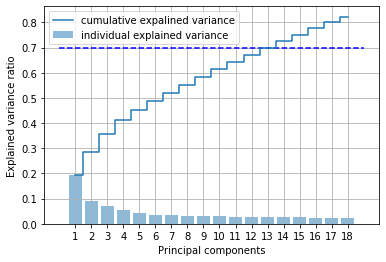

MSE(X=pca, y=log): 35753498122.75885
log MSE(X=pca, y=log): 0.02668346965066545


In [23]:
# 単一モデル検証 - PCA
from sklearn.decomposition import PCA

## 次元削減 36 to 18
pca = PCA(n_components = int(X_train_std.shape[1]/2))
pca = pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
print(X_train_pca.shape)

## 分散説明率
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1, X_train_pca.shape[1]+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, X_train_pca.shape[1]+1), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, X_train_pca.shape[1]+1))
plt.hlines(0.7, 0, X_train_pca.shape[1]+1,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

# 学習, 予測
X_valid_pca = pca.transform(X_valid_std)
svr_pca = SVR()
svr_pca.fit(X_train_pca, y_train_log)
y_pred_pca = svr_pca.predict(X_valid_pca)
print(f'MSE(X=pca, y=log): {mean_squared_error(y_valid_log, np.exp(y_pred_pca))}')
print(f'log MSE(X=pca, y=log): {mean_squared_error(y_valid_log, y_pred_pca)}')

In [24]:
# ブレンディング検証: X:{前処理なし, 標準化}, y: {前処理なし, 対数変換}
w = np.array([0, 50, 0, 40, 60])
y_pred_brend_3_raw = np.concatenate((
    y_pred_Xyraw.reshape(-1, 1)*w[0],
    np.exp(y_pred_Xraw).reshape(-1, 1)*w[1],
    y_pred_yraw.reshape(-1, 1)*w[2],
    np.exp(y_pred_noraw).reshape(-1, 1)*w[3],
    np.exp(y_pred_pca).reshape(-1, 1)*w[4]
), axis=1)
y_pred_brend_3_log = np.concatenate((
    np.log(y_pred_Xyraw).reshape(-1, 1)*w[0],
    y_pred_Xraw.reshape(-1, 1)*w[1],
    np.log(y_pred_yraw).reshape(-1, 1)*w[2],
    y_pred_noraw.reshape(-1, 1)*w[3],
    y_pred_pca.reshape(-1, 1)*w[4]
), axis=1)

y_pred_brend_3_raw = np.sum(y_pred_brend_3_raw, axis=1) / np.sum(w)
y_pred_brend_3_log = np.sum(y_pred_brend_3_log, axis=1) / np.sum(w)

print('raw:')
print(y_pred_brend_3_raw[:10])
print(y_valid[:10])
print('log:')
print(y_pred_brend_3_log[:10])
print(y_valid_log[:10])
print(f'MSE(Brending 3): {mean_squared_error(y_valid, y_pred_brend_3_raw)}')
print(f'log MSE(Brending 3): {mean_squared_error(y_valid_log, y_pred_brend_3_log)}')

raw:
[204848.50454791 156399.70698176 107379.39922573 210470.09000068
 103495.7404877  107670.09159014 257949.8574328  144269.91767295
 383911.59505431 138238.14588309]
[200624 133000 110000 192000  88000  85000 282922 141000 745000 148800]
log:
[12.22962015 11.95914573 11.57829352 12.25610037 11.5449743  11.58262526
 12.45541702 11.8789485  12.60612612 11.83263114]
[12.20918779 11.79810441 11.60823564 12.16525065 11.38509209 11.35040654
 12.55292652 11.85651517 13.5211395  11.9103584 ]
MSE(Brending 3): 1339911346.9589856
log MSE(Brending 3): 0.022294725067489186


前処理パターンを複数用意しブレンディングすることでやや精度を上げることができた。

目的変数の対数変換を行わなかった2パターンについては、考慮しないほうがわずかではあるが成績が良くなった。

# 【問題2】
## バギングのスクラッチ実装
バギング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

## バギングとは
バギングは入力データの選び方を多様化する方法です。学習データから重複を許した上でランダムに抜き出すことで、N種類のサブセット（**ブートストラップサンプル**）を作り出します。それらによってモデルをN個学習し、推定結果の平均をとります。ブレンディングと異なり、それぞれの重み付けを変えることはありません。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


scikit-learnのtrain_test_splitを、shuffleパラメータをTrueにして使うことで、ランダムにデータを分割することができます。これによりブートストラップサンプルが手に入ります。


推定結果の平均をとる部分はブースティングと同様の実装になります。

今回はサブセットを**5種類**として学習を行う。

モデルは単一モデル検証で比較的精度が低かった決定木モデルを用いる。

学習データはX_train_stdの50%を用いて行う。

In [25]:
# 単一モデル検証1
X_train_bag_1, _, y_train_bag_1, _ = train_test_split(X_train_std, y_train_log, random_state=1, train_size=0.5, shuffle=True)
dtree_bag_1 = DecisionTreeRegressor()
dtree_bag_1.fit(X_train_bag_1, y_train_bag_1)
y_pred_bag_1 = dtree_bag_1.predict(X_valid_std)
print(f'MSE(bag 1): {mean_squared_error(y_valid_log, y_pred_bag_1)}')

MSE(bag 1): 0.055287660688490704


In [26]:
# 単一モデル検証2
X_train_bag_2, _, y_train_bag_2, _ = train_test_split(X_train_std, y_train_log, random_state=2, train_size=0.5, shuffle=True)
dtree_bag_2 = DecisionTreeRegressor()
dtree_bag_2.fit(X_train_bag_2, y_train_bag_2)
y_pred_bag_2 = dtree_bag_2.predict(X_valid_std)
print(f'MSE(bag 2): {mean_squared_error(y_valid_log, y_pred_bag_2)}')

MSE(bag 2): 0.059089064730804365


In [27]:
# 単一モデル検証3
X_train_bag_3, _, y_train_bag_3, _ = train_test_split(X_train_std, y_train_log, random_state=3, train_size=0.5, shuffle=True)
dtree_bag_3 = DecisionTreeRegressor()
dtree_bag_3.fit(X_train_bag_3, y_train_bag_3)
y_pred_bag_3 = dtree_bag_3.predict(X_valid_std)
print(f'MSE(bag 3): {mean_squared_error(y_valid_log, y_pred_bag_3)}')

MSE(bag 3): 0.051578790581821146


In [28]:
# 単一モデル検証4
X_train_bag_4,  _, y_train_bag_4, _ = train_test_split(X_train_std, y_train_log, random_state=4, train_size=0.5, shuffle=True)
dtree_bag_4 = DecisionTreeRegressor()
dtree_bag_4.fit(X_train_bag_4, y_train_bag_4)
y_pred_bag_4 = dtree_bag_4.predict(X_valid_std)
print(f'MSE(bag 4): {mean_squared_error(y_valid_log, y_pred_bag_4)}')

MSE(bag 4): 0.05813510798501385


In [29]:
# 単一モデル検証5
X_train_bag_5, _, y_train_bag_5, _ = train_test_split(X_train_std, y_train_log, random_state=5, train_size=0.5, shuffle=True)
dtree_bag_5 = DecisionTreeRegressor()
dtree_bag_5.fit(X_train_bag_5, y_train_bag_5)
y_pred_bag_5 = dtree_bag_5.predict(X_valid_std)
print(f'MSE(bag 5): {mean_squared_error(y_valid_log, y_pred_bag_5)}')

MSE(bag 5): 0.05669290693945374


In [30]:
# 単一モデル検証 - 全データ検証
dtree_all = DecisionTreeRegressor()
dtree_all.fit(X_train_std, y_train_log)
y_pred_all = dtree_all.predict(X_valid_std)
print(f'MSE(all data): {mean_squared_error(y_valid_log, y_pred_all)}')

MSE(all data): 0.04089835089402813


In [31]:
# ブレンディング検証: svr_bag_{1-5}
w = np.array([1, 1, 1, 1, 1])
y_pred_bag = np.concatenate((
    y_pred_bag_1.reshape(-1, 1)*w[0],
    y_pred_bag_2.reshape(-1, 1)*w[1],
    y_pred_bag_3.reshape(-1, 1)*w[2],
    y_pred_bag_4.reshape(-1, 1)*w[3],
    y_pred_bag_5.reshape(-1, 1)*w[4]
), axis=1)

y_pred_bag = np.sum(y_pred_bag, axis=1) / np.sum(w)

print(y_pred_bag[:10])
print(y_valid_log[:10])
print(f'MSE(Bagging): {mean_squared_error(y_valid_log, y_pred_bag)}')

[12.05809657 11.77310662 11.65769843 12.34875183 11.62467447 11.63647978
 12.40530317 11.71497157 13.18316765 11.95793811]
[12.20918779 11.79810441 11.60823564 12.16525065 11.38509209 11.35040654
 12.55292652 11.85651517 13.5211395  11.9103584 ]
MSE(Bagging): 0.02826917155463641


バギングを用いることで、単一識別器に比べかなり精度が良くなった。

In [35]:
# 関数化
def bagging(X_train, X_valid, y_train, y_valid, n_estimators=5):
    y_preds = []
    mses = []
    models = []
    for i in range(n_estimators):
        # learning
        X_train_bag, _, y_train_bag, _ = train_test_split(X_train, y_train, random_state=i, train_size=0.5, shuffle=True)
        dtree = DecisionTreeRegressor()
        dtree.fit(X_train_bag, y_train_bag)
        
        # predict
        y_preds.append(dtree.predict(X_valid).reshape(-1, 1))
        
        # calc MSE
        mses.append(mean_squared_error(y_valid, y_preds[-1]))
        print(f'{i}, MSE: {mses[-1]}')
        
        models.append(dtree)
    # bagging
    y_pred_mean = np.mean(np.concatenate(y_preds, axis=1), axis=1)
    print(f'final MSE: {mean_squared_error(y_valid, y_pred_mean)}')
    return y_pred_mean, models

In [44]:
y_pred_bag, models = bagging(X_train_std, X_valid_std, y_train_log, y_valid_log, n_estimators=1000)

0, MSE: 0.041980606569223415
1, MSE: 0.05103602342567172
2, MSE: 0.05269437146699353
3, MSE: 0.05448417001286003
4, MSE: 0.0594644430106039
5, MSE: 0.05241348217869852
6, MSE: 0.048732645001121545
7, MSE: 0.050852641862681444
8, MSE: 0.06125389597872889
9, MSE: 0.04546753715884102
10, MSE: 0.04956726693639053
11, MSE: 0.046613824714267754
12, MSE: 0.05534709811747669
13, MSE: 0.052636152092068345
14, MSE: 0.04636407869367837
15, MSE: 0.05409264184659116
16, MSE: 0.04898308743894395
17, MSE: 0.058524581625612304
18, MSE: 0.05407372526079288
19, MSE: 0.04600967064157717
20, MSE: 0.04801532919217625
21, MSE: 0.05297410661794592
22, MSE: 0.04640461432568095
23, MSE: 0.035920513860408405
24, MSE: 0.04360408937168873
25, MSE: 0.04365461467750579
26, MSE: 0.046650284235022293
27, MSE: 0.039520578293432765
28, MSE: 0.04859473380605618
29, MSE: 0.053896213386082414
30, MSE: 0.04777744753467328
31, MSE: 0.04323464283609952
32, MSE: 0.04577763546078943
33, MSE: 0.04928316627329766
34, MSE: 0.0439

[12.20918779 11.79810441 11.60823564 12.16525065 11.38509209]
[12.12024549 11.82370662 11.59932865 12.33052329 11.38225199]
MSE: 0.018425459107630694


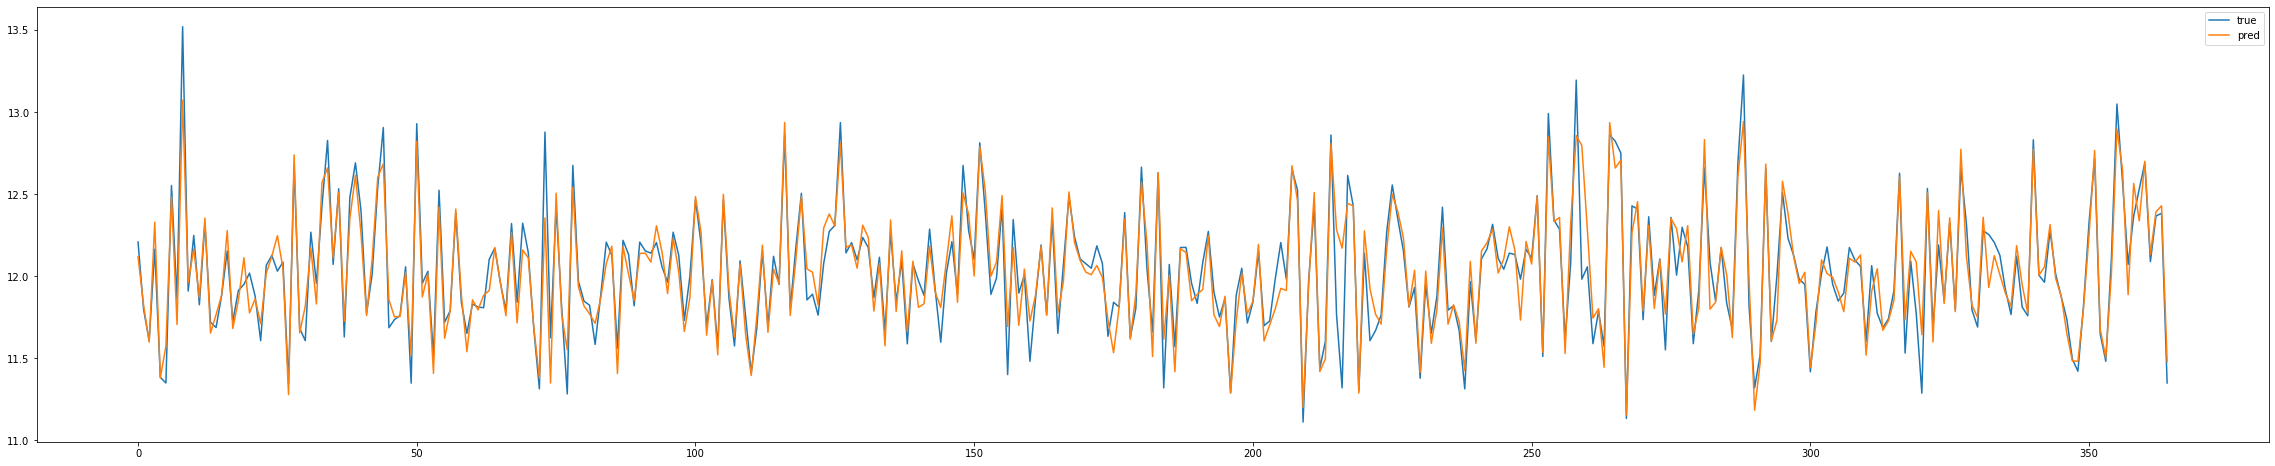

In [34]:
print(y_valid_log[:5])
print(y_pred_bag[:5])
print(f'MSE: {mean_squared_error(y_valid_log, y_pred_bag)}')
%matplotlib inline
fig = plt.figure(figsize=(40, 8))
plt.plot(range(y_valid_log.shape[0]), y_valid_log, label='true')
plt.plot(range(y_pred_bag.shape[0]), y_pred_bag, label='pred')
plt.legend()
plt.show()

In [45]:
test_df = pd.read_csv('test.csv')
X_test = test_df.select_dtypes(include='number').iloc[:, 1:].fillna(method = 'bfill').fillna(method = 'ffill').values
ids = test_df['Id'].values

X_test_std = scaler.transform(X_test)
y_test_preds = []
for i in range(len(models)):
        # predict
        y_test_preds.append(models[i].predict(X_test_std).reshape(-1, 1))
y_test_pred_mean = np.exp(np.mean(np.concatenate(y_test_preds, axis=1), axis=1))

submit_arr = np.concatenate((ids.reshape(-1, 1), y_test_pred_mean.reshape(-1, 1)), axis=1)
submit_df = pd.DataFrame(submit_arr, columns=['Id', 'SalePrice'])
submit_df['Id'] = submit_df['Id'].astype(np.int32)
display(submit_df)
submit_df.info()
submit_df.to_csv('submit.csv', index=False)

,Id,SalePrice
0,1461,125980.376017
1,1462,154140.032969
2,1463,177941.761567
3,1464,179664.449767
4,1465,196864.773773
...,...,...
1454,2915,81374.059209
1455,2916,84925.640868
1456,2917,159926.534136
1457,2918,110956.428686


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int32  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 17.2 KB
